@Author: Bhupinder Singh

@Date: 17-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 17-01-2023

@Title: Build a machine learning model to predict whether a person makes over 50K a
year or not


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc

### Import the dataset 

In [3]:
data = pd.read_csv('classification_2.csv', sep=',')

In [4]:
data.columns =['age',	'workclass',	'fnlwgt',	'education'	,'education-num',	'marital-status',	'occupation',	'relationship'	,'race',	'sex',	'capital-gain'	,'capital-loss',	'hours-per-week',	'native-country','y']

### Getting Insights of dataset

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  y               32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for Null values in data set

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
y                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  y               32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for Outliers in data set

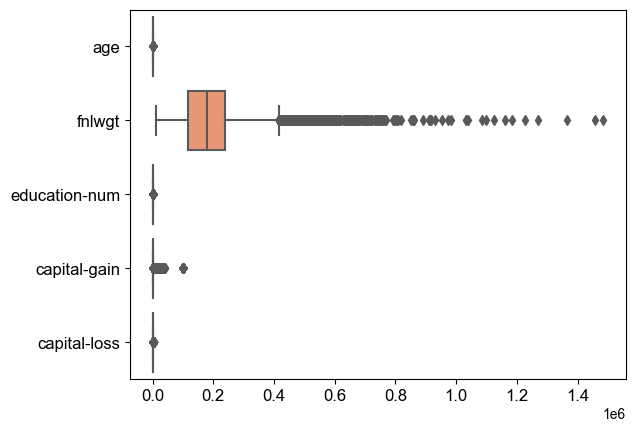

In [10]:
#create the plot
ax = sns.boxplot(data = data[['age','fnlwgt','education-num',	'marital-status','capital-gain'	,'capital-loss']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [11]:
def cap_data(data):
    """
    Description:
            This function is used to remove outliers
    Parameter:
        data : Imported dataset
    Return:
            Returns the data without outliers
    """
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.88]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  age
capping the  workclass
capping the  fnlwgt
capping the  education
capping the  education-num
capping the  marital-status
capping the  occupation
capping the  relationship
capping the  race
capping the  sex
capping the  capital-gain
capping the  capital-loss
capping the  hours-per-week
capping the  native-country
capping the  y


C:\Users\Asus\AppData\Local\Temp\ipykernel_43380\3429365897.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_43380\3429365897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


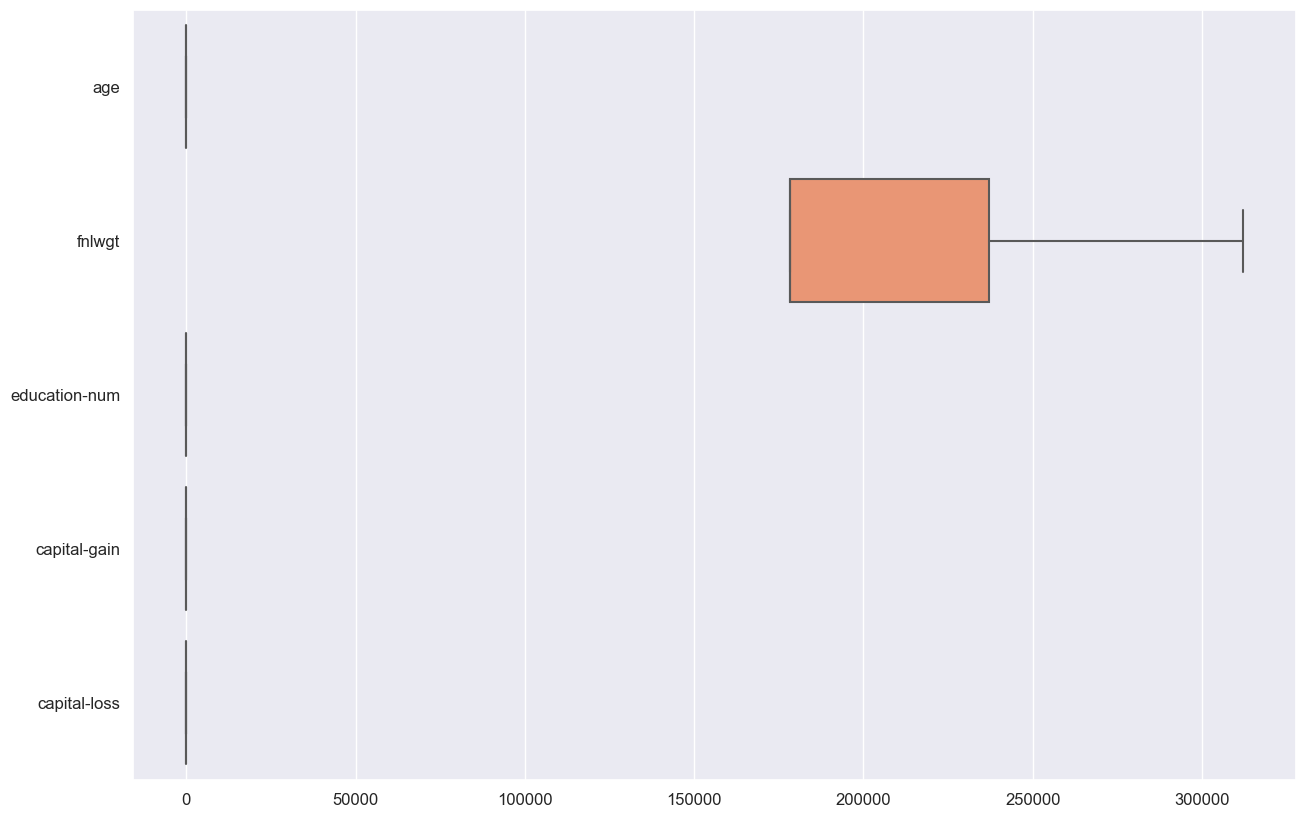

In [12]:

#create the plot
ax = sns.boxplot(data = data[['age','fnlwgt','education-num',	'marital-status','capital-gain'	,'capital-loss']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Replacing '?' with mode values

In [13]:
data = data.replace(' ?', np.NaN)
replace = data.fillna(data.mode().iloc[0], inplace=True)

data encoding

In [14]:
data.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,50,Self-emp-not-inc,178363.00,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1,38,Private,215646.00,HS-grad,10,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721.00,11th,10,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,37,Private,312129.16,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582.00,Masters,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,178363.00,9th,10,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,40,Jamaica,<=50K
6,52,Self-emp-not-inc,209642.00,HS-grad,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,37,Private,178363.00,Masters,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
8,42,Private,178363.00,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
9,37,Private,280464.00,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,50,United-States,>50K


label encoding

In [15]:
data[ 'workclass' ] = data[ 'workclass' ].astype( 'category' )  
data[ 'education' ] = data[ 'education' ].astype( 'category' ) 
data['marital-status'] = data['marital-status'].astype( 'category') 
data['relationship'] = data['relationship'].astype( 'category' ) 
data['race'] = data['race'].astype( 'category' ).astype( 'category') 
data['sex'] = data['sex'].astype( 'category' ).astype( 'category' )
data['native-country'] = data['native-country'].astype( 'category' ).astype( 'category' )
data['occupation'] = data['occupation'].astype( 'category' ).astype( 'category' )


data['workclass'] = data['workclass'].cat.codes
data['education'] = data['education'].cat.codes
data['marital-status'] = data['marital-status'].cat.codes
data['relationship'] = data['relationship'].cat.codes
data['race'] = data['race'].cat.codes
data['sex'] = data['sex'].cat.codes
data['native-country'] = data['native-country'].cat.codes
data['occupation'] = data['occupation'].cat.codes

Binary encoding

In [16]:
def binary_encode(data_frame,col_name):
    """
    Description:
        Function to binary encode the categorical columns in data frame 
    Parameter:
        data_frame: Imported dataframe
        col_name: column name that need to be encoded
    Return:
            Returns encoded_list
    """
    encoded_list = []
    for i in data_frame[col_name]:
        if (i == ' >50K'):
            encoded_value = 1
        else:
            encoded_value = 0
        encoded_list.append(encoded_value)
    return encoded_list

In [17]:
row,col=data.shape
y_list = binary_encode(data,'y')
data.drop(['y'],axis=1,inplace=True)
data.insert(loc=col-1, column="y", value=y_list)

In [18]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,50,5,178363.00,9,13,2,3,0,4,1,0,0,40,38,0
1,38,3,215646.00,11,10,0,5,1,4,1,0,0,40,38,0
2,53,3,234721.00,1,10,2,5,0,2,1,0,0,40,38,0
3,37,3,312129.16,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582.00,12,13,2,3,5,4,0,0,0,40,38,0
5,49,3,178363.00,6,10,3,7,1,2,0,0,0,40,22,0
6,52,5,209642.00,11,10,2,3,0,4,1,0,0,45,38,1
7,37,3,178363.00,12,13,4,9,1,4,0,0,0,50,38,1
8,42,3,178363.00,9,13,2,3,0,4,1,0,0,40,38,1
9,37,3,280464.00,15,10,2,3,0,2,1,0,0,50,38,1


vif

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32560 non-null  int64  
 1   workclass       32560 non-null  int8   
 2   fnlwgt          32560 non-null  float64
 3   education       32560 non-null  int8   
 4   education-num   32560 non-null  int64  
 5   marital-status  32560 non-null  int8   
 6   occupation      32560 non-null  int8   
 7   relationship    32560 non-null  int8   
 8   race            32560 non-null  int8   
 9   sex             32560 non-null  int8   
 10  capital-gain    32560 non-null  int64  
 11  capital-loss    32560 non-null  int64  
 12  hours-per-week  32560 non-null  int64  
 13  native-country  32560 non-null  int8   
 14  y               32560 non-null  int64  
dtypes: float64(1), int64(6), int8(8)
memory usage: 2.0 MB


In [20]:
data=data.drop(['capital-loss','capital-gain'],axis=1)

In [21]:
X = data[list(data.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
10,89.471917,hours-per-week
4,62.687920,education-num
11,34.285067,native-country
0,32.602303,age
8,19.743050,race
2,18.431196,fnlwgt
1,8.852685,workclass
3,8.049398,education
9,4.628544,sex
5,4.091896,marital-status


In [22]:
#data = data.drop(['hours-per-week','education-num','native-country','fnlwgt','race','workclass','age','education'], axis=1)
data = data.drop(['native-country','fnlwgt','race','age'], axis=1)
#data = data.drop(['native-country','fnlwgt','race','age'], axis=1)
#X = data[['age','education'	,	'marital-status',	'occupation',	'relationship'	,	'sex']]
X = data[list(data.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,68.414955,hours-per-week
2,54.558962,education-num
0,8.732537,workclass
1,7.821353,education
6,4.576592,sex
3,4.025482,marital-status
4,3.445539,occupation
5,2.632924,relationship


### Feature Scaling

In [23]:
df = data[list(data.columns[:-1])]
for col in df.columns:
        print("Scaling the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64') | ((data[col].dtype)=='int8') | ((data[col].dtype)=='uint8')):
                data[col] = (data[col] - data[col].mean())/data[col].std()
print("Train data")
data.head(5)

Scaling the  workclass
Scaling the  education
Scaling the  education-num
Scaling the  marital-status
Scaling the  occupation
Scaling the  relationship
Scaling the  sex
Scaling the  hours-per-week
Train data


,workclass,education,education-num,marital-status,occupation,relationship,sex,hours-per-week,y
0,1.721309,-0.335438,1.658533,-0.406177,-0.790144,-0.900163,0.703077,-0.610077,0
1,-0.085222,0.181316,-0.656956,-1.733999,-0.286698,-0.277805,0.703077,-0.610077,0
2,-0.085222,-2.402452,-0.656956,-0.406177,-0.286698,-0.900163,0.703077,-0.610077,0
3,-0.085222,-0.335438,1.658533,-0.406177,0.720193,2.211624,-1.422276,-0.610077,0
4,-0.085222,0.439693,1.658533,-0.406177,-0.790144,2.211624,-1.422276,-0.610077,0


###  Split the dataset into training set and test set

In [24]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,workclass,education,education-num,marital-status,occupation,relationship,sex,hours-per-week,y
0,1.721309,-0.335438,1.658533,-0.406177,-0.790144,-0.900163,0.703077,-0.610077,0
1,-0.085222,0.181316,-0.656956,-1.733999,-0.286698,-0.277805,0.703077,-0.610077,0
2,-0.085222,-2.402452,-0.656956,-0.406177,-0.286698,-0.900163,0.703077,-0.610077,0
3,-0.085222,-0.335438,1.658533,-0.406177,0.720193,2.211624,-1.422276,-0.610077,0
4,-0.085222,0.439693,1.658533,-0.406177,-0.790144,2.211624,-1.422276,-0.610077,0
...,...,...,...,...,...,...,...,...,...
26043,-0.085222,0.181316,-0.656956,-0.406177,1.727085,-0.900163,0.703077,-0.610077,0
26044,-0.085222,0.181316,-0.656956,-0.406177,-0.286698,-0.900163,0.703077,-0.610077,0
26045,-0.085222,-0.852191,0.886704,0.921646,1.475362,-0.277805,-1.422276,-0.610077,0
26046,2.624575,-0.335438,1.658533,-0.406177,-0.538421,-0.900163,0.703077,-0.610077,1


Test dataframe


,workclass,education,education-num,marital-status,occupation,relationship,sex,hours-per-week,y
26048,-0.085222,0.181316,-0.656956,0.921646,0.216748,0.966909,0.703077,-0.610077,0
26049,-0.085222,1.214823,-0.656956,-0.406177,1.727085,-0.900163,0.703077,-0.610077,1
26050,-0.085222,1.214823,-0.656956,0.921646,0.720193,0.966909,0.703077,-0.610077,0
26051,-0.085222,0.181316,-0.656956,0.921646,-0.286698,0.966909,0.703077,-0.610077,0
26052,-0.085222,0.181316,-0.656956,-1.733999,1.727085,-0.277805,0.703077,-0.610077,0
...,...,...,...,...,...,...,...,...,...
32555,-0.085222,-0.852191,0.886704,-0.406177,1.475362,2.211624,-1.422276,-0.610077,0
32556,-0.085222,0.181316,-0.656956,-0.406177,-0.034975,-0.900163,0.703077,-0.610077,1
32557,-0.085222,0.181316,-0.656956,2.249469,-1.545312,1.589267,-1.422276,-0.610077,0
32558,-0.085222,0.181316,-0.656956,0.921646,-1.545312,0.966909,0.703077,-0.610077,0


((26048, 9), (6512, 9))

### Extracting the values of features

In [25]:
rows,col=train_data.shape
data_n=train_data.values
m=len(data_n[:,-1])
x_train=data_n[:,0:col].reshape(m,col)

rows_2,col_2=test_data.shape
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:col_2].reshape(m2,col_2)

In [26]:
def Euclidean_distance(row1, row2):
    """
    Description:
            Function used to calculate the euclidean distance of two points
    Parameter:
        row1 : data points of first row
        row2 : data points of second row
    Return: 
            return the distance between two points
    """
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2            #(x1-x2)**2+(y1-y2)**2
    return math.sqrt(distance)

In [27]:
def Get_Neighbors(train, test_row, num):
    """
    Description:
            Function used to get the nearest points to the test row
    Parameter:
        train : x points of train row
        test_row : x points of test row
        num : Number of neighbours
    Return: 
            return the points of nearest neighbours
    """
    distance = list() # []
    data1 = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data1.append(i)
    distance = np.array(distance)
    data1 = np.array(data1)
    """ we are finding index of min distance """
    index_dist = distance.argsort()
    """ we arange our data acco. to index """
    data1 = data1[index_dist]
    """ we are slicing num number of datas """
    neighbors = data1[:num]
    
    return neighbors

In [28]:
def predict_classification(train, test_row, num):
    """
    Description:
            Function to classify the test_row to either 0 or 1 class
    Parameter:
        train : x points of train row
        test_row : x points of test row
        num : K value ie Number of neibhours we want to consider
    Return: 
            return the predicted value
    """

    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

In [29]:
y_pred=[]
y_test = x_test[:, -1]
for test_row in x_test:
    prediction = predict_classification(x_train,test_row , math.floor(math.sqrt(m)))
    #print(f"We expected {test_row[-1]}, Got {prediction}")
    y_pred.append(prediction)

### Implementing Performances Metrices

In [30]:
print(y_test)

[0. 1. 0. ... 0. 0. 1.]


### Accuracy 

In [31]:
def Evaluate(y_test, y_pred):
    """
    Description:
        Function to evaluate the accuracy of the model
    Parameter:
        y_test : y value of dataset
        y_pred : pred  of test row
        num : K value ie Number of neibhours we want to consider
    Return: 
        return the accuracy
    """
    
    n_correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_test)
    return acc

In [32]:
Evaluate(y_test, y_pred)

0.8175675675675675

In [33]:
def confusion_matrix(pred,original): #pass predicted and original labels to this function
    matrix=np.zeros((2,2)) # form an empty matric of 2x2
    for i in range(len(pred)): #the confusion matrix is for 2 classes: 1,0
        #1=positive, 0=negative
        if int(pred[i])==0 and int(original[i])==0: 
            matrix[0,0]+=1 #True Negative
        elif int(pred[i])==1 and int(original[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(pred[i])==0 and int(original[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(pred[i])==1 and int(original[i])==1:
            matrix[1,1]+=1 #True positive
    
    #the above code adds up the frequencies of the tps,tns,fps,fns and a matrix is formed
    return matrix

Confusion Matrix

In [34]:
matrix=confusion_matrix(y_pred,y_test)
precision=(matrix[1,1])/(matrix[1,1]+matrix[0,1])
print("Precision:",precision)

recall=(matrix[1,1])/(matrix[1,1]+matrix[1,0])
print("Recall:",recall)

specificity=(matrix[0,0])/(matrix[0,0]+matrix[0,1])
print("Specificity:",specificity)

f1=2*(precision*recall)/(precision+recall)
print("F1 score:",f1)

accuracy=(matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,0]+matrix[0,1]+matrix[1,1]) 
print("Accuracy:",accuracy)
print(matrix)

Precision: 0.6716666666666666
Recall: 0.50375
Specificity: 0.9197882736156352
F1 score: 0.5757142857142857
Accuracy: 0.8175675675675675
[[4518.  394.]
 [ 794.  806.]]


Cap Curve analysis

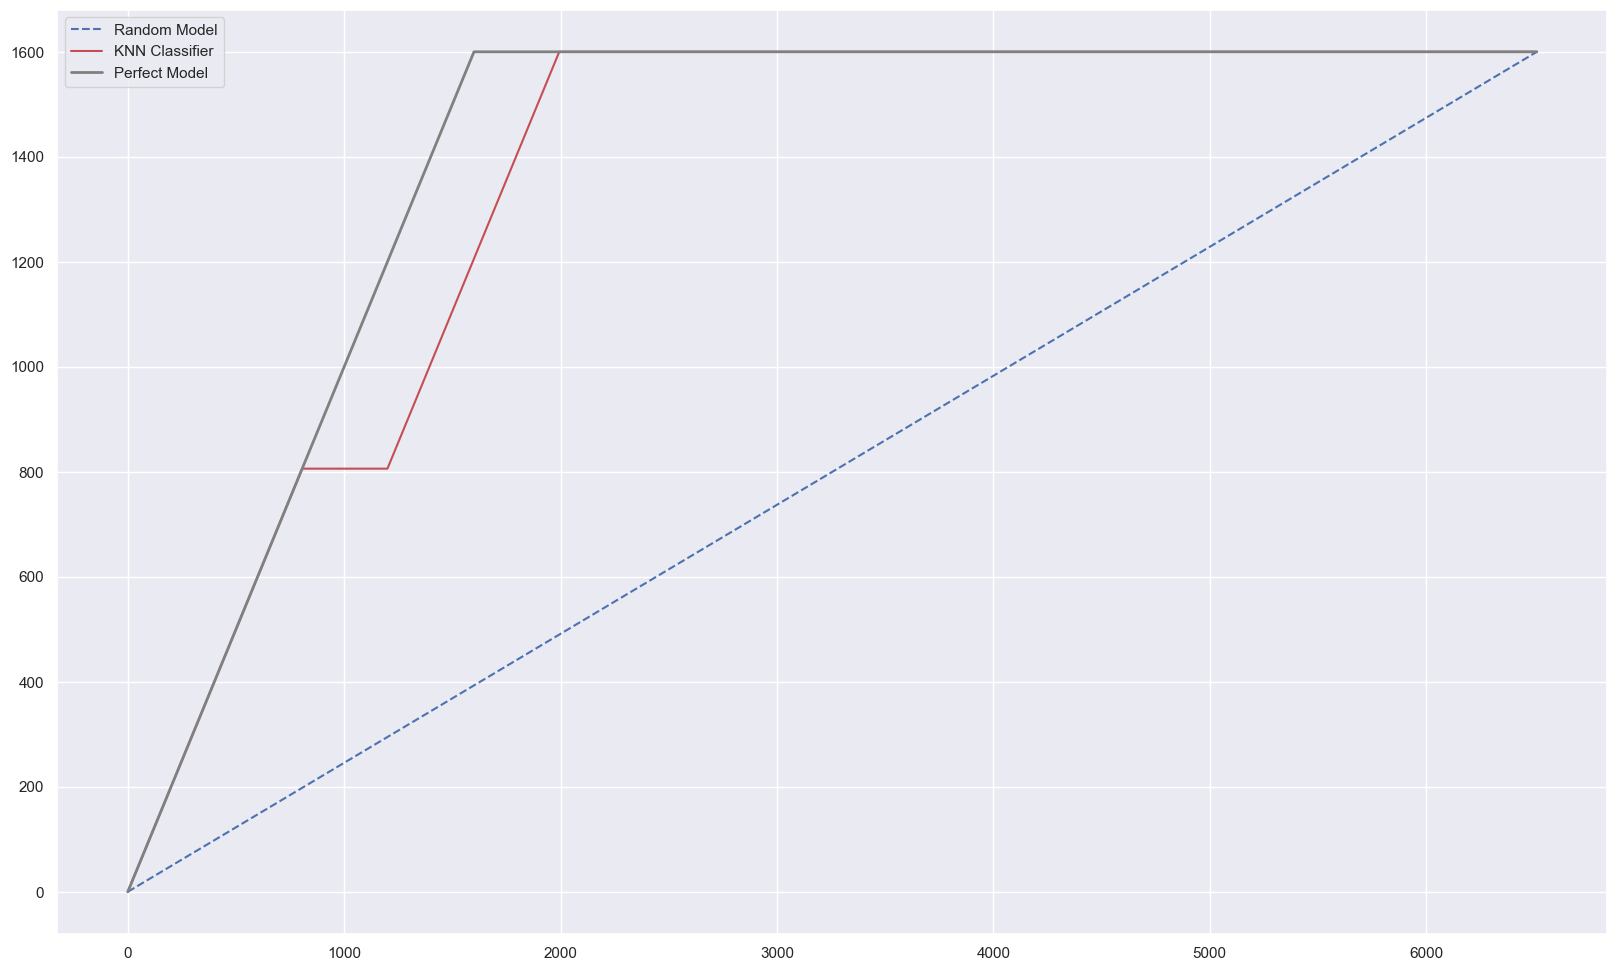

In [35]:
#plotting
total = len(y_test)

#counting 1 lables in test data
one_count = np.sum(y_test)

#counting 0 lables
zero_count = total - one_count

#model plotting
lm = [y for _,y in sorted(zip(y_pred,y_test), reverse=True)]
x = np.arange(0, total+1)
y = np.append([0], np.cumsum(lm))

plt.figure(figsize = (20, 12))

plt.plot([0,total], [0,one_count], c='b', linestyle='--', label='Random Model')
plt.plot(x,y, c='r', label = 'KNN Classifier')
plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')


plt.legend()
plt.show()

In [36]:
# Area under Random Model
a = auc([0, total], [0, one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area between Trained and Random Model
aR = auc(x, y) - a

print("Accuracy Rate for KNN Classifier: {}".format(aR / aP))

Accuracy Rate for KNN Classifier: 0.9203898615635179
